## Energy Data Exploration and Preprocessing

In this notebook, we will explore and preprocess the energy data. The main steps include data loading, data exploration, data cleaning, feature engineering, correlation analysis, outlier handling, and data imputation.

### Step 1: Data Loading
We start by loading the energy data from a CSV file named 'energy.csv' into a pandas DataFrame called 'df'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('energy.csv')
df.shape
df.tail()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,153655.0000,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57
3375,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,...,126774.3984,4.325542e+05,7203.419922,7.203420e+05,False,NaN,Compliant,NaN,41.27,2.26


### Step 2: Data Exploration
We perform initial data exploration to understand the data's basic properties. We display the shape of the DataFrame and show the last few rows of the data. We also check the data types of each column and plot a bar chart to visualize the percentage of missing values in each column.

In [2]:
df.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

<Axes: >

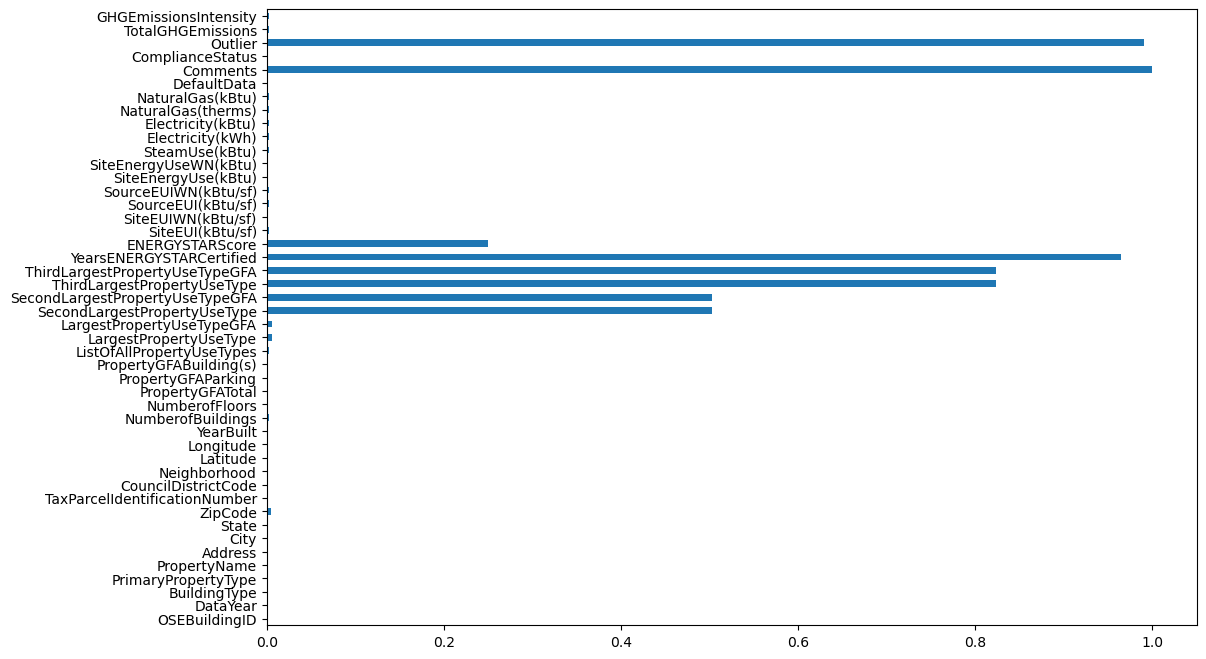

In [3]:
df.isnull().mean(axis = 0).plot.barh(figsize = (12,8))

### Step 3: Data Cleaning and Type Conversion
We drop unnecessary columns and convert specific columns to their appropriate data types.

In [4]:
df.drop(['SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified','Comments','Outlier'], axis = 1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,22.11,1.57


In [5]:
types = {'OSEBuildingID':'float', 
'DataYear':'float',
'BuildingType':'str',
'PrimaryPropertyType':'str',
'PropertyName':'str',
'Address':'str',
'City':'str',
'State':'str',
'ZipCode':'float',
'TaxParcelIdentificationNumber':'str',
'CouncilDistrictCode':'float',
'Neighborhood':'str',
'Latitude':'float',
'Longitude':'float',
'YearBuilt':'float',
'NumberofBuildings':'float',
'NumberofFloors':'float',
'PropertyGFATotal':'float',
'PropertyGFAParking':'float',
'PropertyGFABuilding(s)':'float',
'ListOfAllPropertyUseTypes':'str',
'LargestPropertyUseType':'str',
'LargestPropertyUseTypeGFA':'float',
'ENERGYSTARScore':'float',
'SiteEUI(kBtu/sf)':'float',
'SiteEUIWN(kBtu/sf)':'float',
'SourceEUI(kBtu/sf)':'float',
'SourceEUIWN(kBtu/sf)':'float',
'SiteEnergyUse(kBtu)':'float',
'SiteEnergyUseWN(kBtu)':'float',
'SteamUse(kBtu)':'float',
'Electricity(kWh)':'float',
'Electricity(kBtu)':'float',
'NaturalGas(therms)':'float',
'NaturalGas(kBtu)':'float',
'DefaultData':'float',
'ComplianceStatus':'str',
'TotalGHGEmissions':'float',
'GHGEmissionsIntensity':'float'}
df = df.astype(types)

### Step 4: Data Filtering
We filter the DataFrame to keep only specific types of buildings, such as 'NonResidential', 'Nonresidential COS', 'Nonresidential WA', and 'SPS-District K-12'.

In [7]:
df_building = pd.DataFrame(data=df['BuildingType'].groupby(df['BuildingType']).count()) #value_counts
df_building

,BuildingType
BuildingType,
Campus,24
Multifamily HR (10+),110
Multifamily LR (1-4),1018
Multifamily MR (5-9),580
NonResidential,1460
Nonresidential COS,85
Nonresidential WA,1
SPS-District K-12,98


In [8]:
df = df.loc[(df['BuildingType'] == 'NonResidential') | 
            (df['BuildingType'] == 'Nonresidential COS') |
            (df['BuildingType'] =='Nonresidential WA') |
            (df['BuildingType'] =='SPS-District K-12')]

<Axes: >

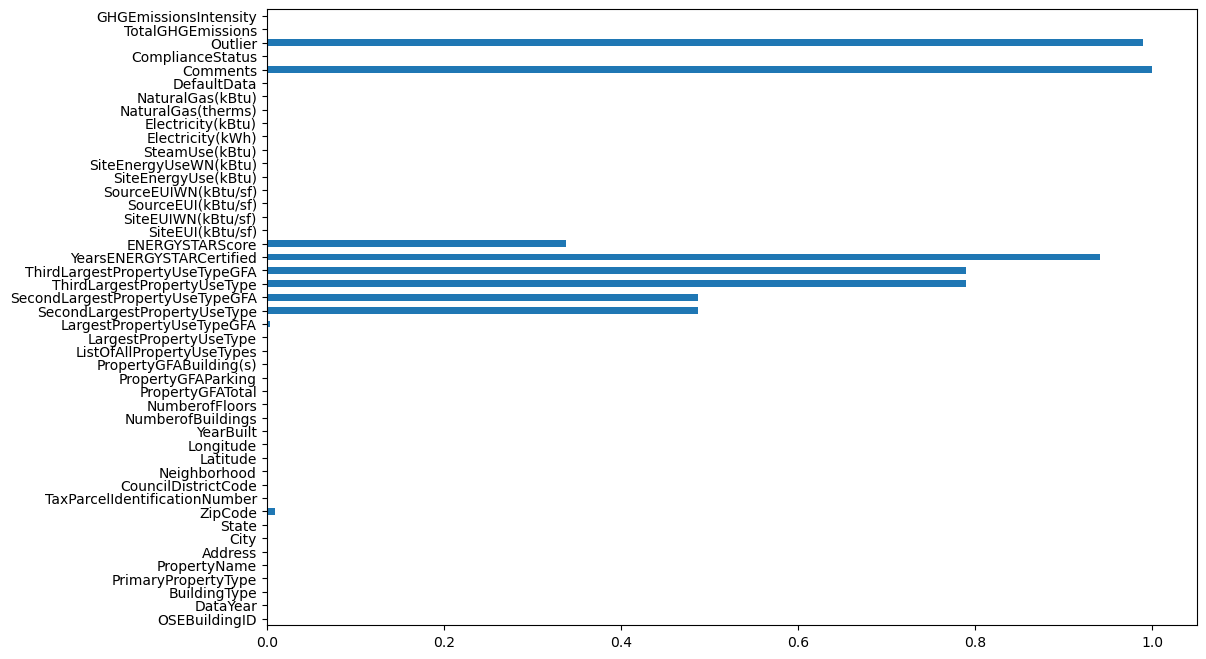

In [11]:
df.isnull().mean(axis = 0).plot.barh(figsize = (12,8))

### Step 5: Correlation Analysis
We generate a correlation heatmap to visualize the correlations between different numerical features in the DataFrame.

/tmp/ipykernel_11105/3736932318.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


<Axes: >

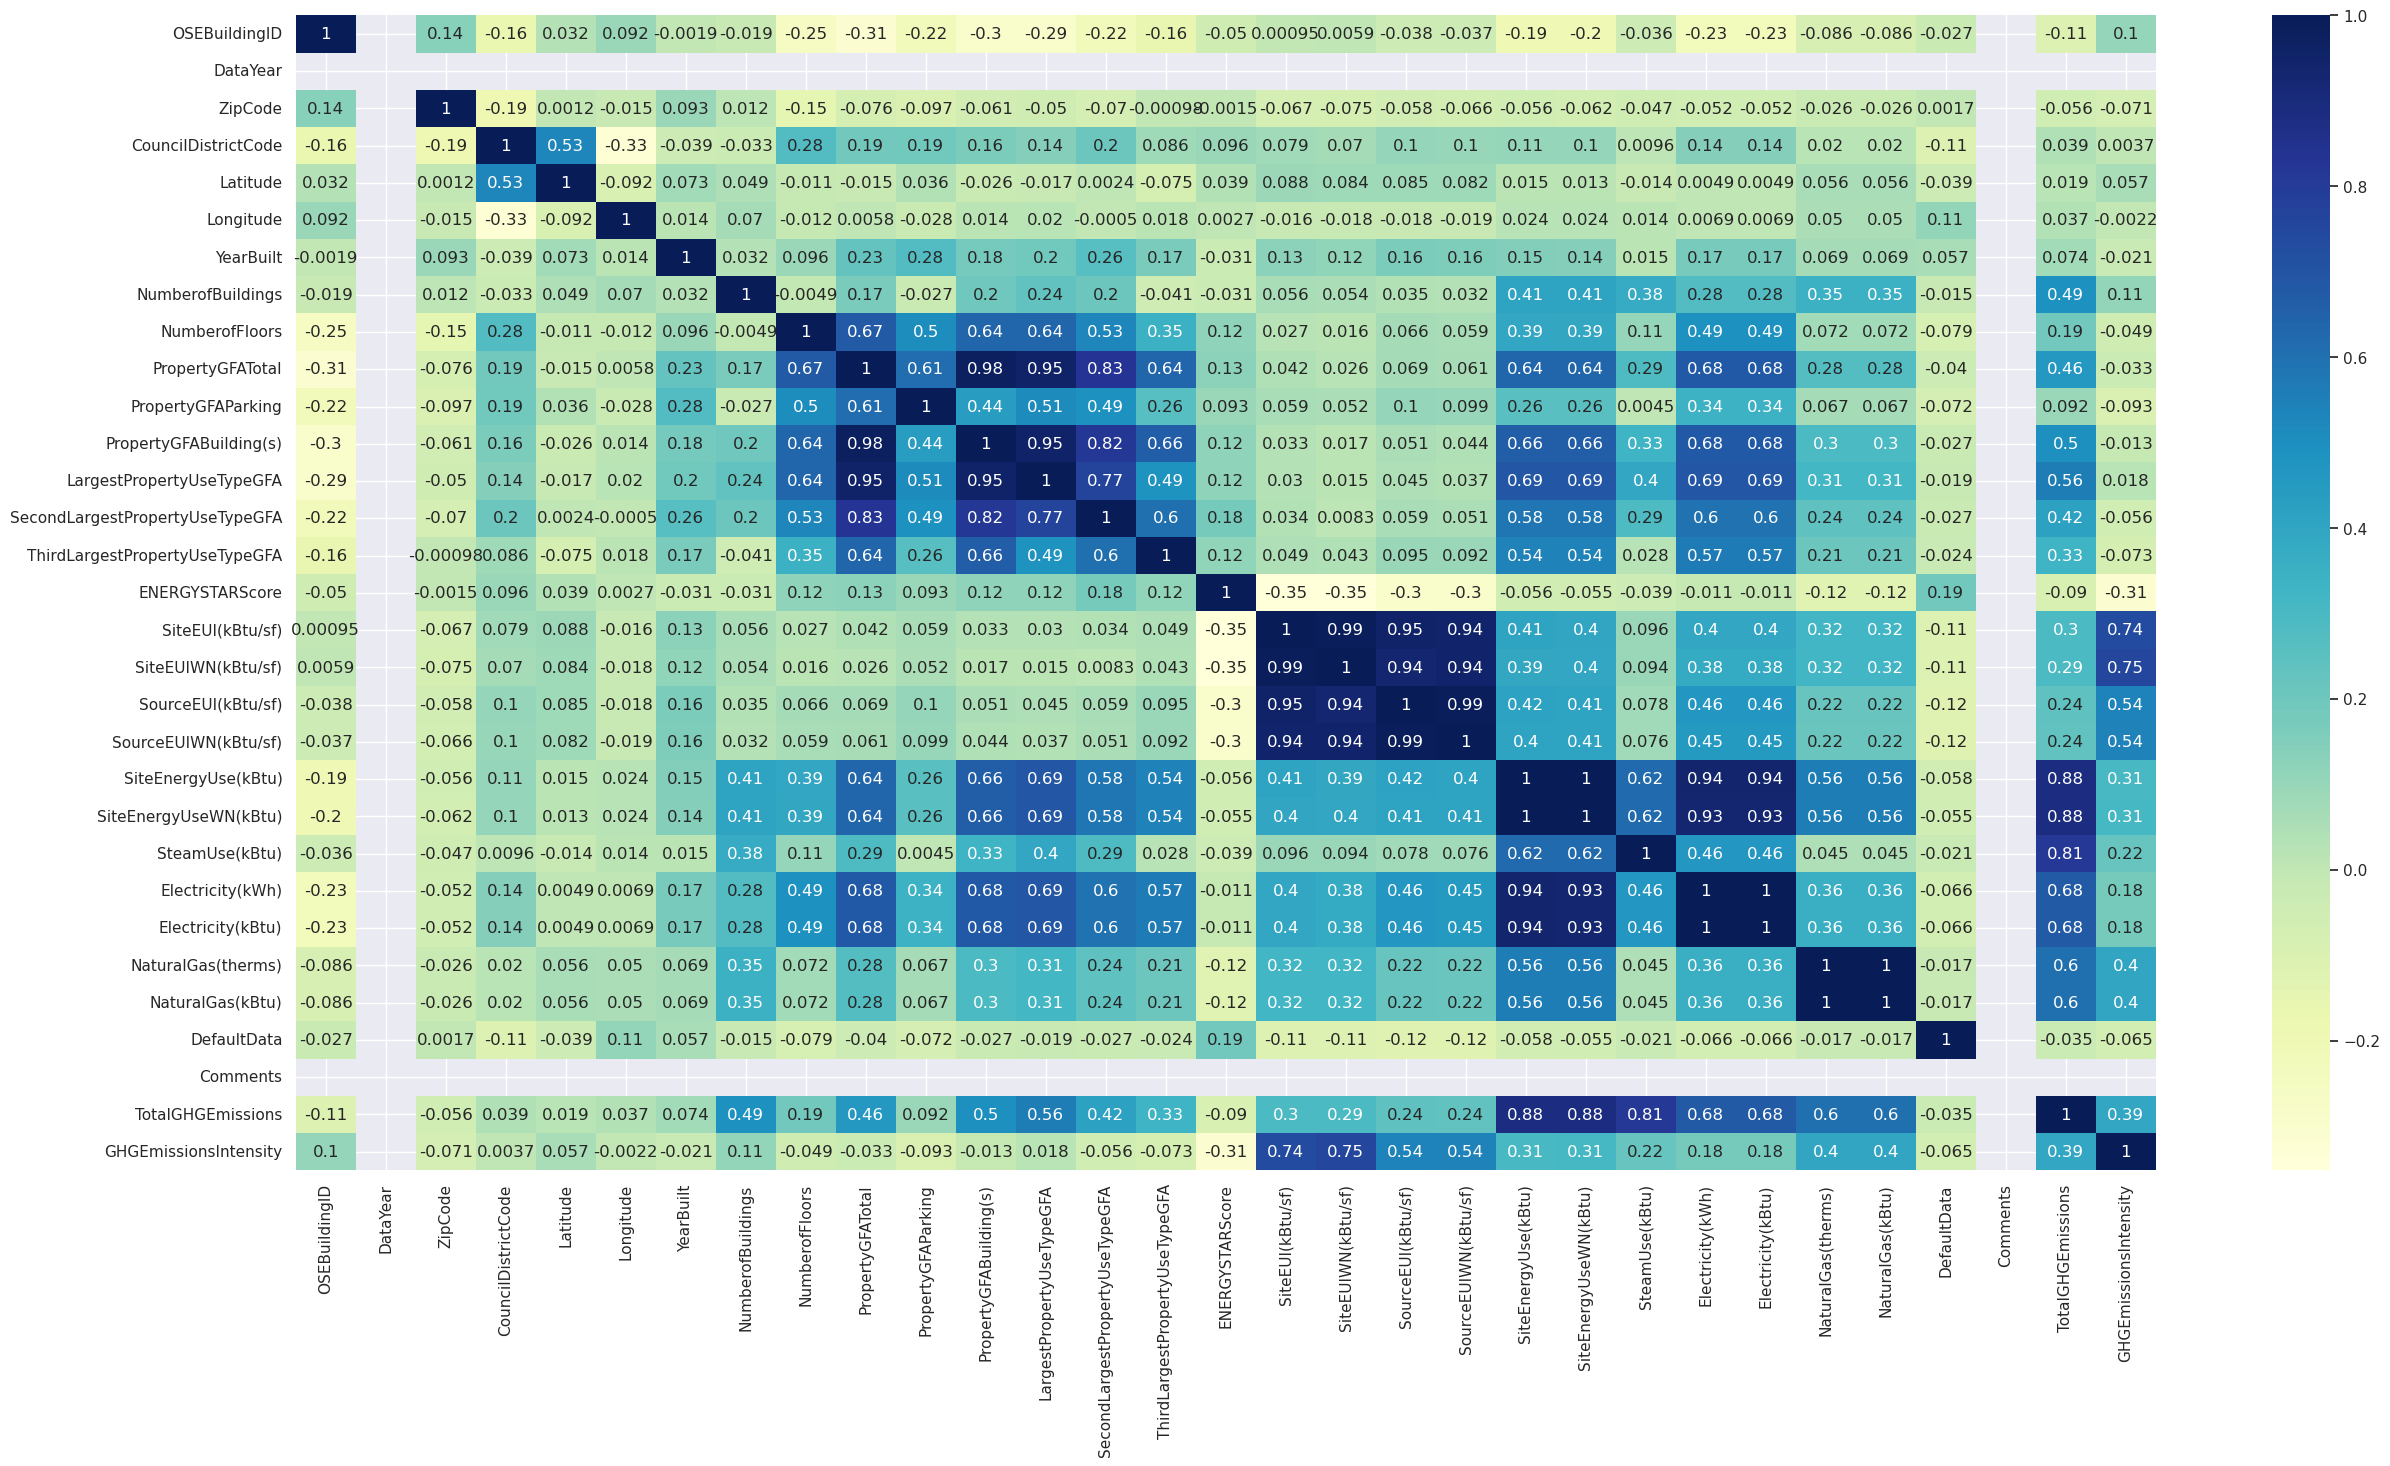

In [12]:
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [13]:
droplist = {
'OSEBuildingID',
'BuildingType',
'PrimaryPropertyType',
'PropertyName',
'Address',
'City',
'State',
'ZipCode',
'TaxParcelIdentificationNumber',
'CouncilDistrictCode',
'Neighborhood',
'DataYear',
'PropertyGFAParking',
'PropertyGFABuilding(s)',
'ListOfAllPropertyUseTypes',
'LargestPropertyUseType',
'LargestPropertyUseTypeGFA',
'SecondLargestPropertyUseType',
'SecondLargestPropertyUseTypeGFA',
'ThirdLargestPropertyUseType',
'ThirdLargestPropertyUseTypeGFA',
'YearsENERGYSTARCertified',
'SiteEUI(kBtu/sf)',
'SiteEUIWN(kBtu/sf)',
'SourceEUIWN(kBtu/sf)',
'SiteEnergyUseWN(kBtu)',
'SteamUse(kBtu)',
'Electricity(kWh)',
'Electricity(kBtu)',
'NaturalGas(therms)',
'NaturalGas(kBtu)',
'DefaultData',
'Comments',
'ComplianceStatus',
'Outlier',
'GHGEmissionsIntensity',
'SourceEUI(kBtu/sf)'}

df.drop(droplist, axis=1, inplace = True)
df.shape



(1644, 9)

### Step 6: Outlier Handling
We apply the Interquartile Range (IQR) method to handle outliers in numerical columns.

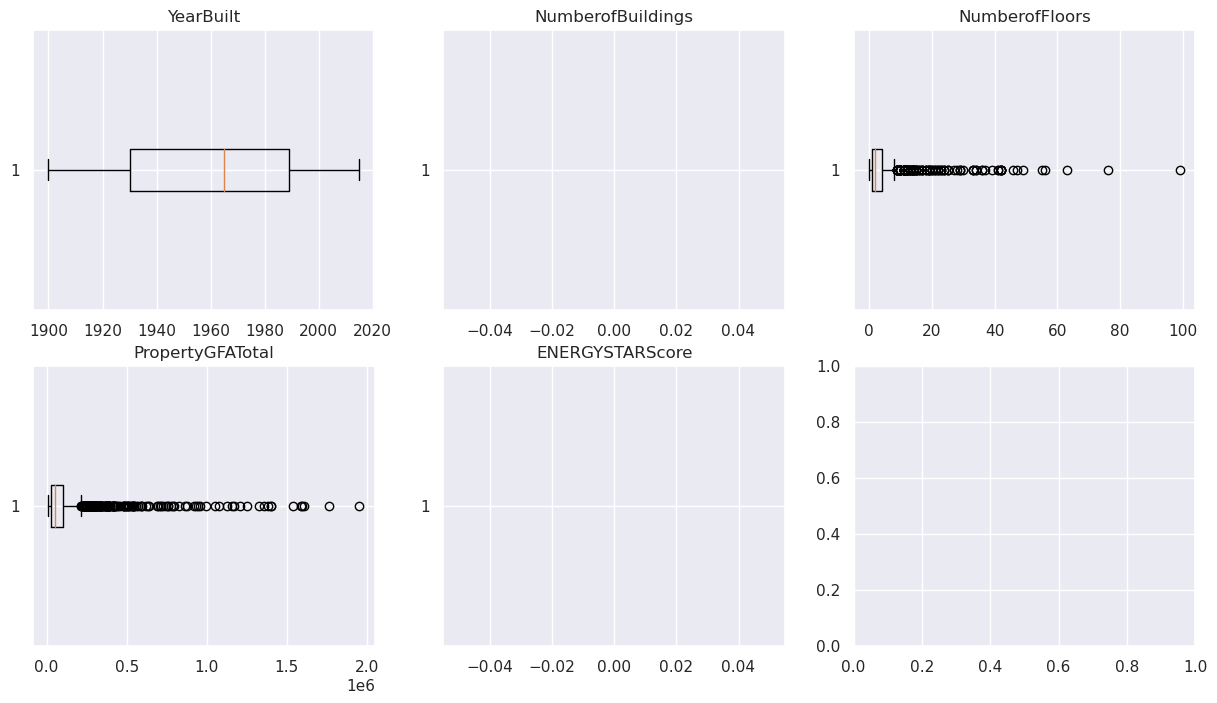

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(15,8))

axs[0, 0].boxplot(df['YearBuilt'],vert=False)
axs[0, 0].set_title('YearBuilt')
axs[0, 1].boxplot(df['NumberofBuildings'],vert=False)
axs[0, 1].set_title('NumberofBuildings')
axs[0, 2].boxplot(df['NumberofFloors'],vert=False)
axs[0, 2].set_title('NumberofFloors')
axs[1, 0].boxplot(df['PropertyGFATotal'],vert=False)
axs[1, 0].set_title('PropertyGFATotal')
axs[1, 1].boxplot(df['ENERGYSTARScore'],vert=False)
axs[1, 1].set_title('ENERGYSTARScore')


plt.show()

In [15]:
f = 1.5
for col in df.columns:
    if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
        percentiles = df[col].quantile([0.1,0.9]).values
        df[col][df[col] <= percentiles[0]] = percentiles[0]
        df[col][df[col] >= percentiles[1]] = percentiles[1]
    else:
        df[col]=df[col]

df.shape

(1644, 9)

### Step 7: Data Visualization
We plot boxplots and histograms to visualize the distribution and outliers of specific numerical features.

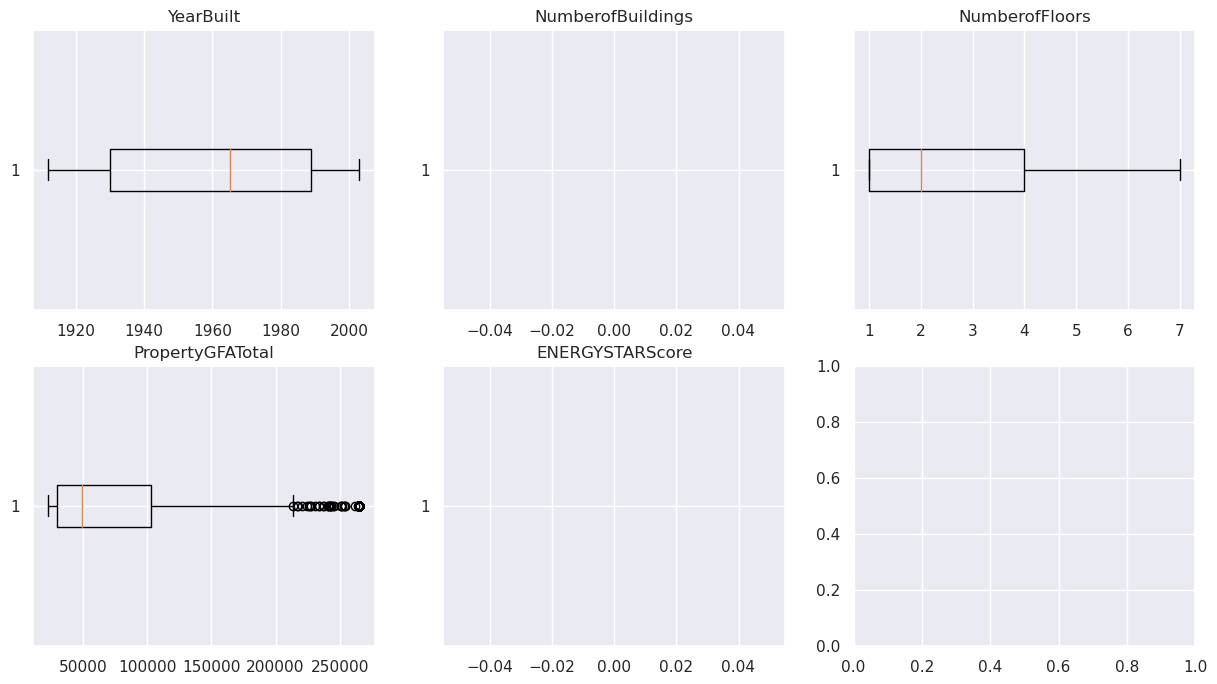

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(15,8))

axs[0, 0].boxplot(df['YearBuilt'],vert=False)
axs[0, 0].set_title('YearBuilt')
axs[0, 1].boxplot(df['NumberofBuildings'],vert=False)
axs[0, 1].set_title('NumberofBuildings')
axs[0, 2].boxplot(df['NumberofFloors'],vert=False)
axs[0, 2].set_title('NumberofFloors')
axs[1, 0].boxplot(df['PropertyGFATotal'],vert=False)
axs[1, 0].set_title('PropertyGFATotal')
axs[1, 1].boxplot(df['ENERGYSTARScore'],vert=False)
axs[1, 1].set_title('ENERGYSTARScore')


plt.show()

<Axes: xlabel='ENERGYSTARScore', ylabel='Count'>

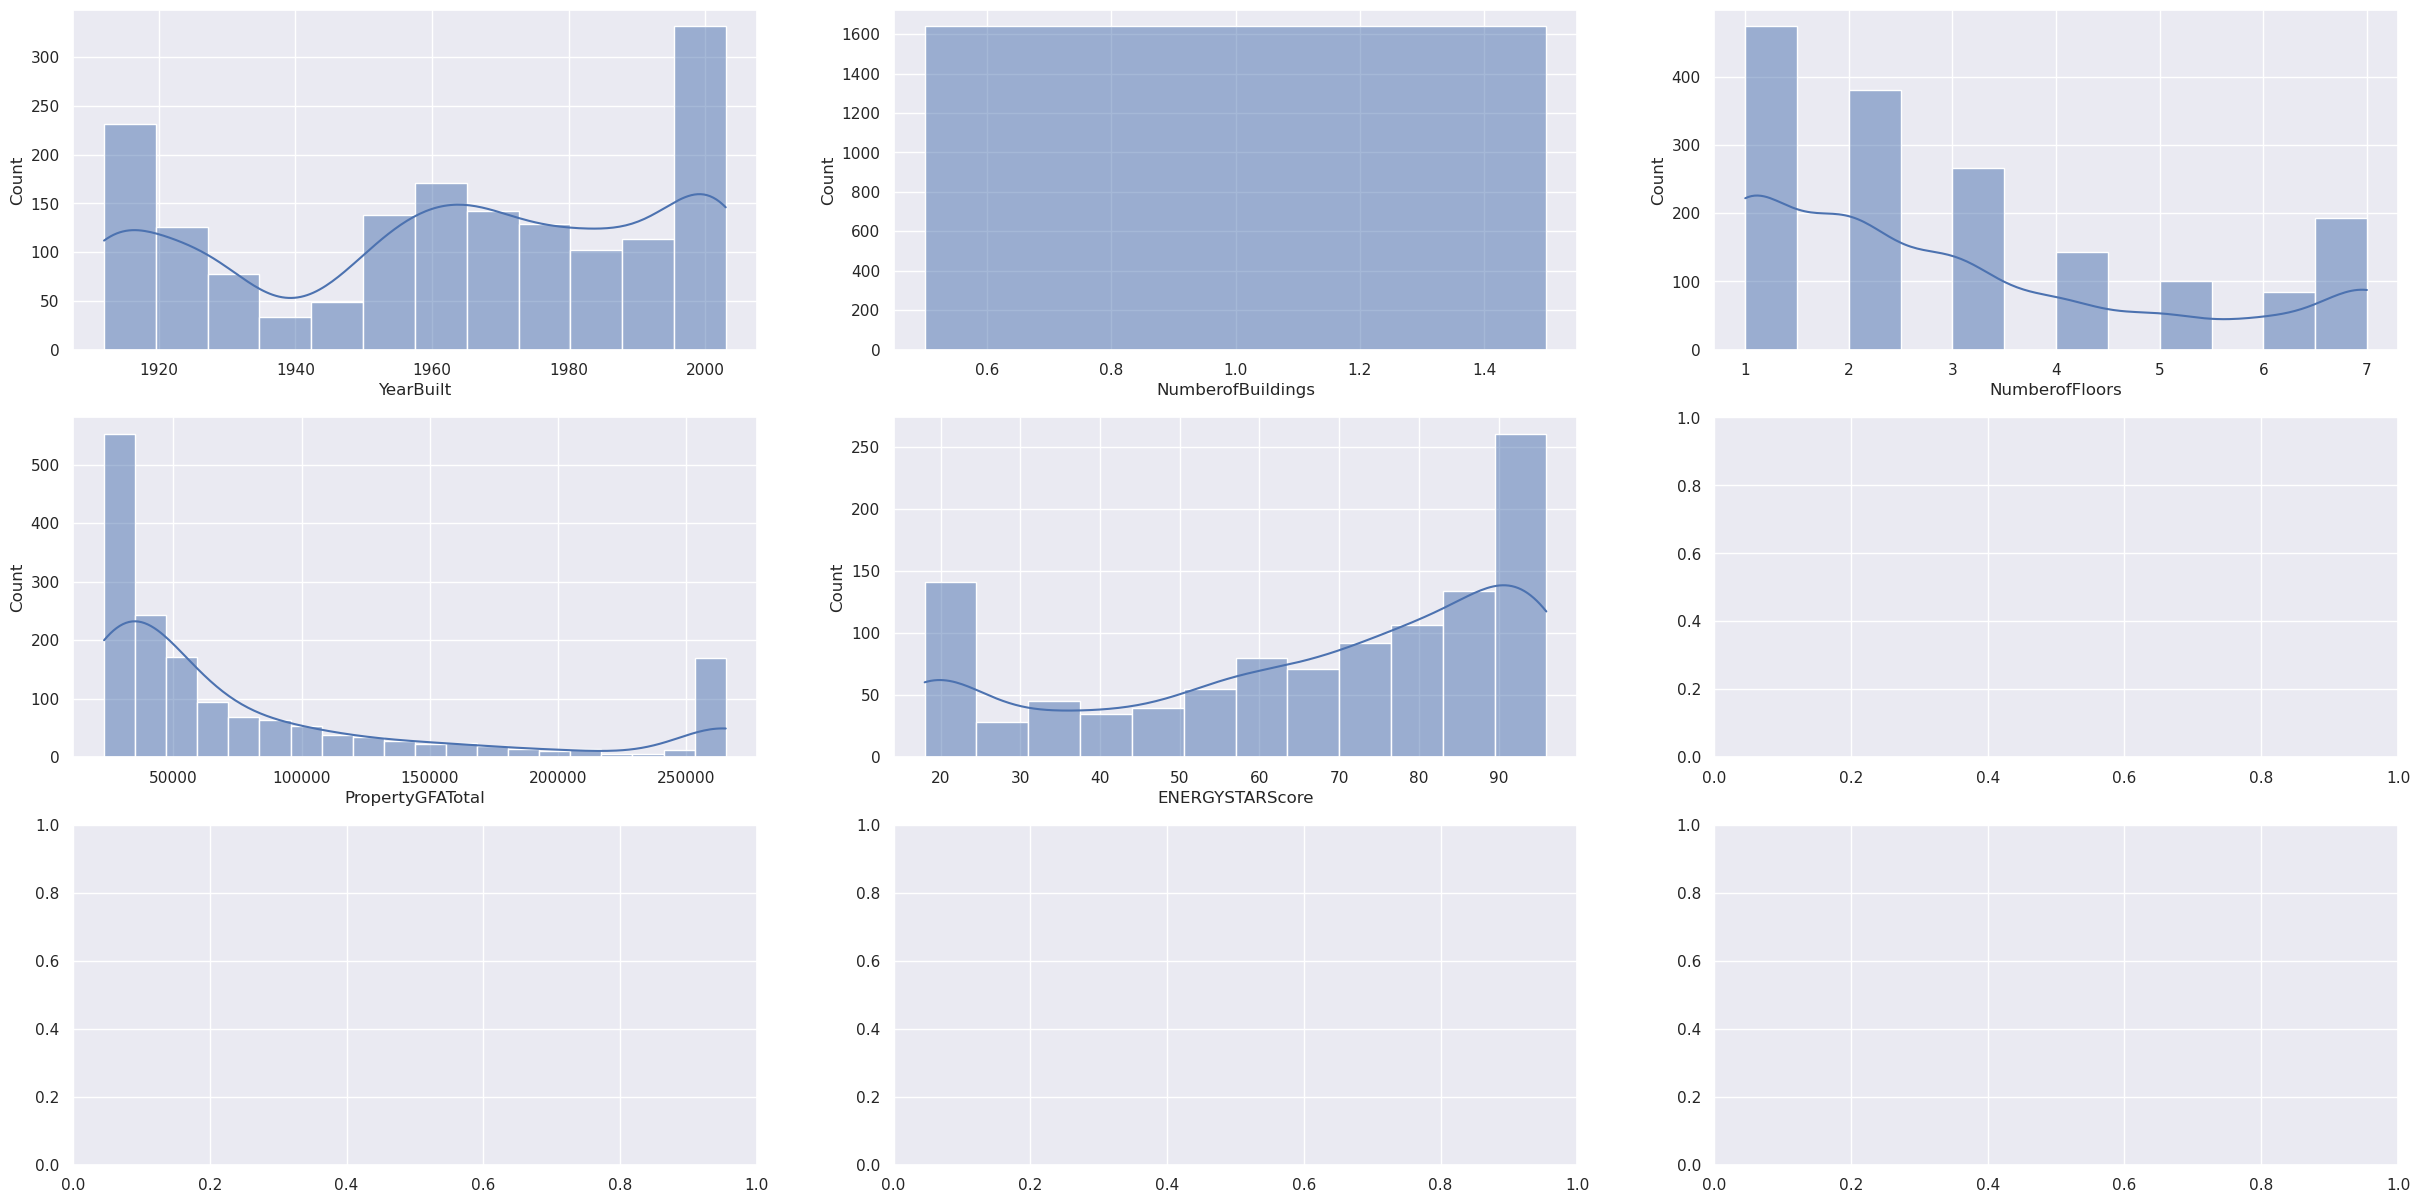

In [17]:
fig, axs = plt.subplots(3, 3)
sns.set(rc = {'figure.figsize':(30,30)})
sns.histplot(data=df, x='YearBuilt', kde=True, ax=axs[0,0])
sns.histplot(data=df, x='NumberofBuildings', kde=True, ax=axs[0,1])
sns.histplot(data=df, x='NumberofFloors', kde=True, ax=axs[0,2])
sns.histplot(data=df, x='PropertyGFATotal', kde=True, ax=axs[1,0])
sns.histplot(data=df, x='ENERGYSTARScore', kde=True, ax=axs[1,1])

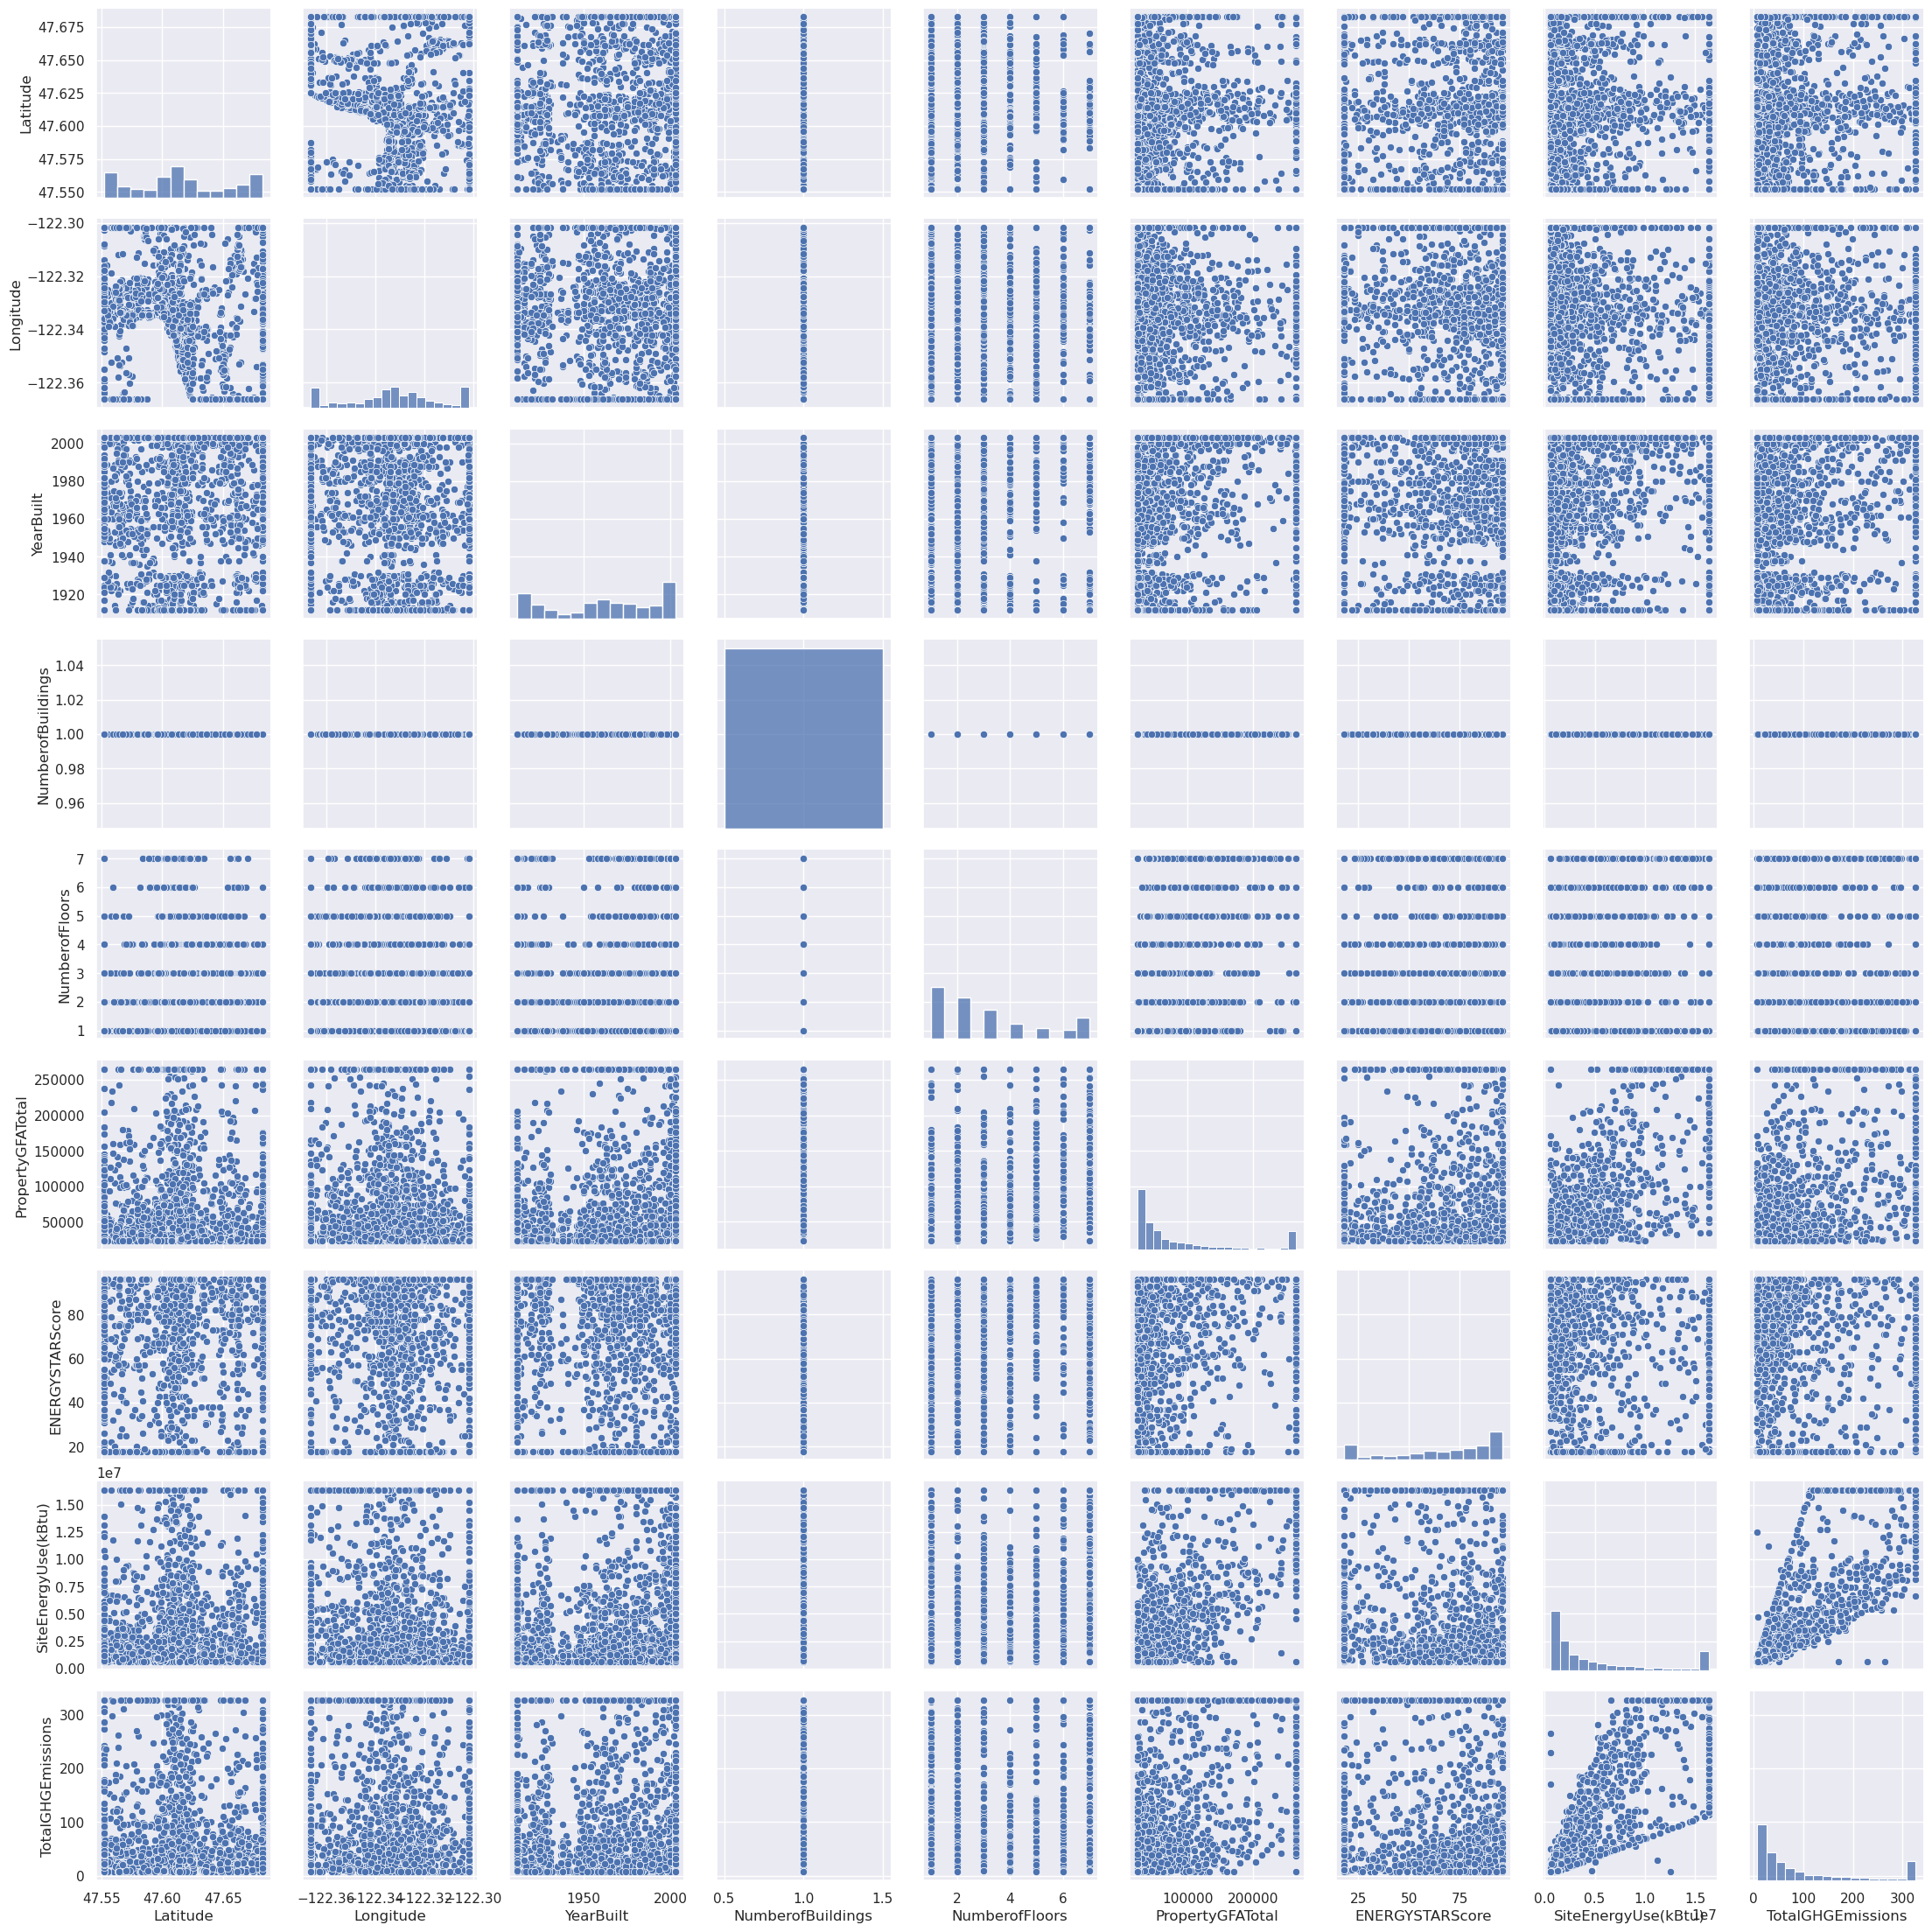

In [18]:
sns.set(rc = {'figure.figsize':(30,15)})
sns.pairplot(df)

<Axes: >

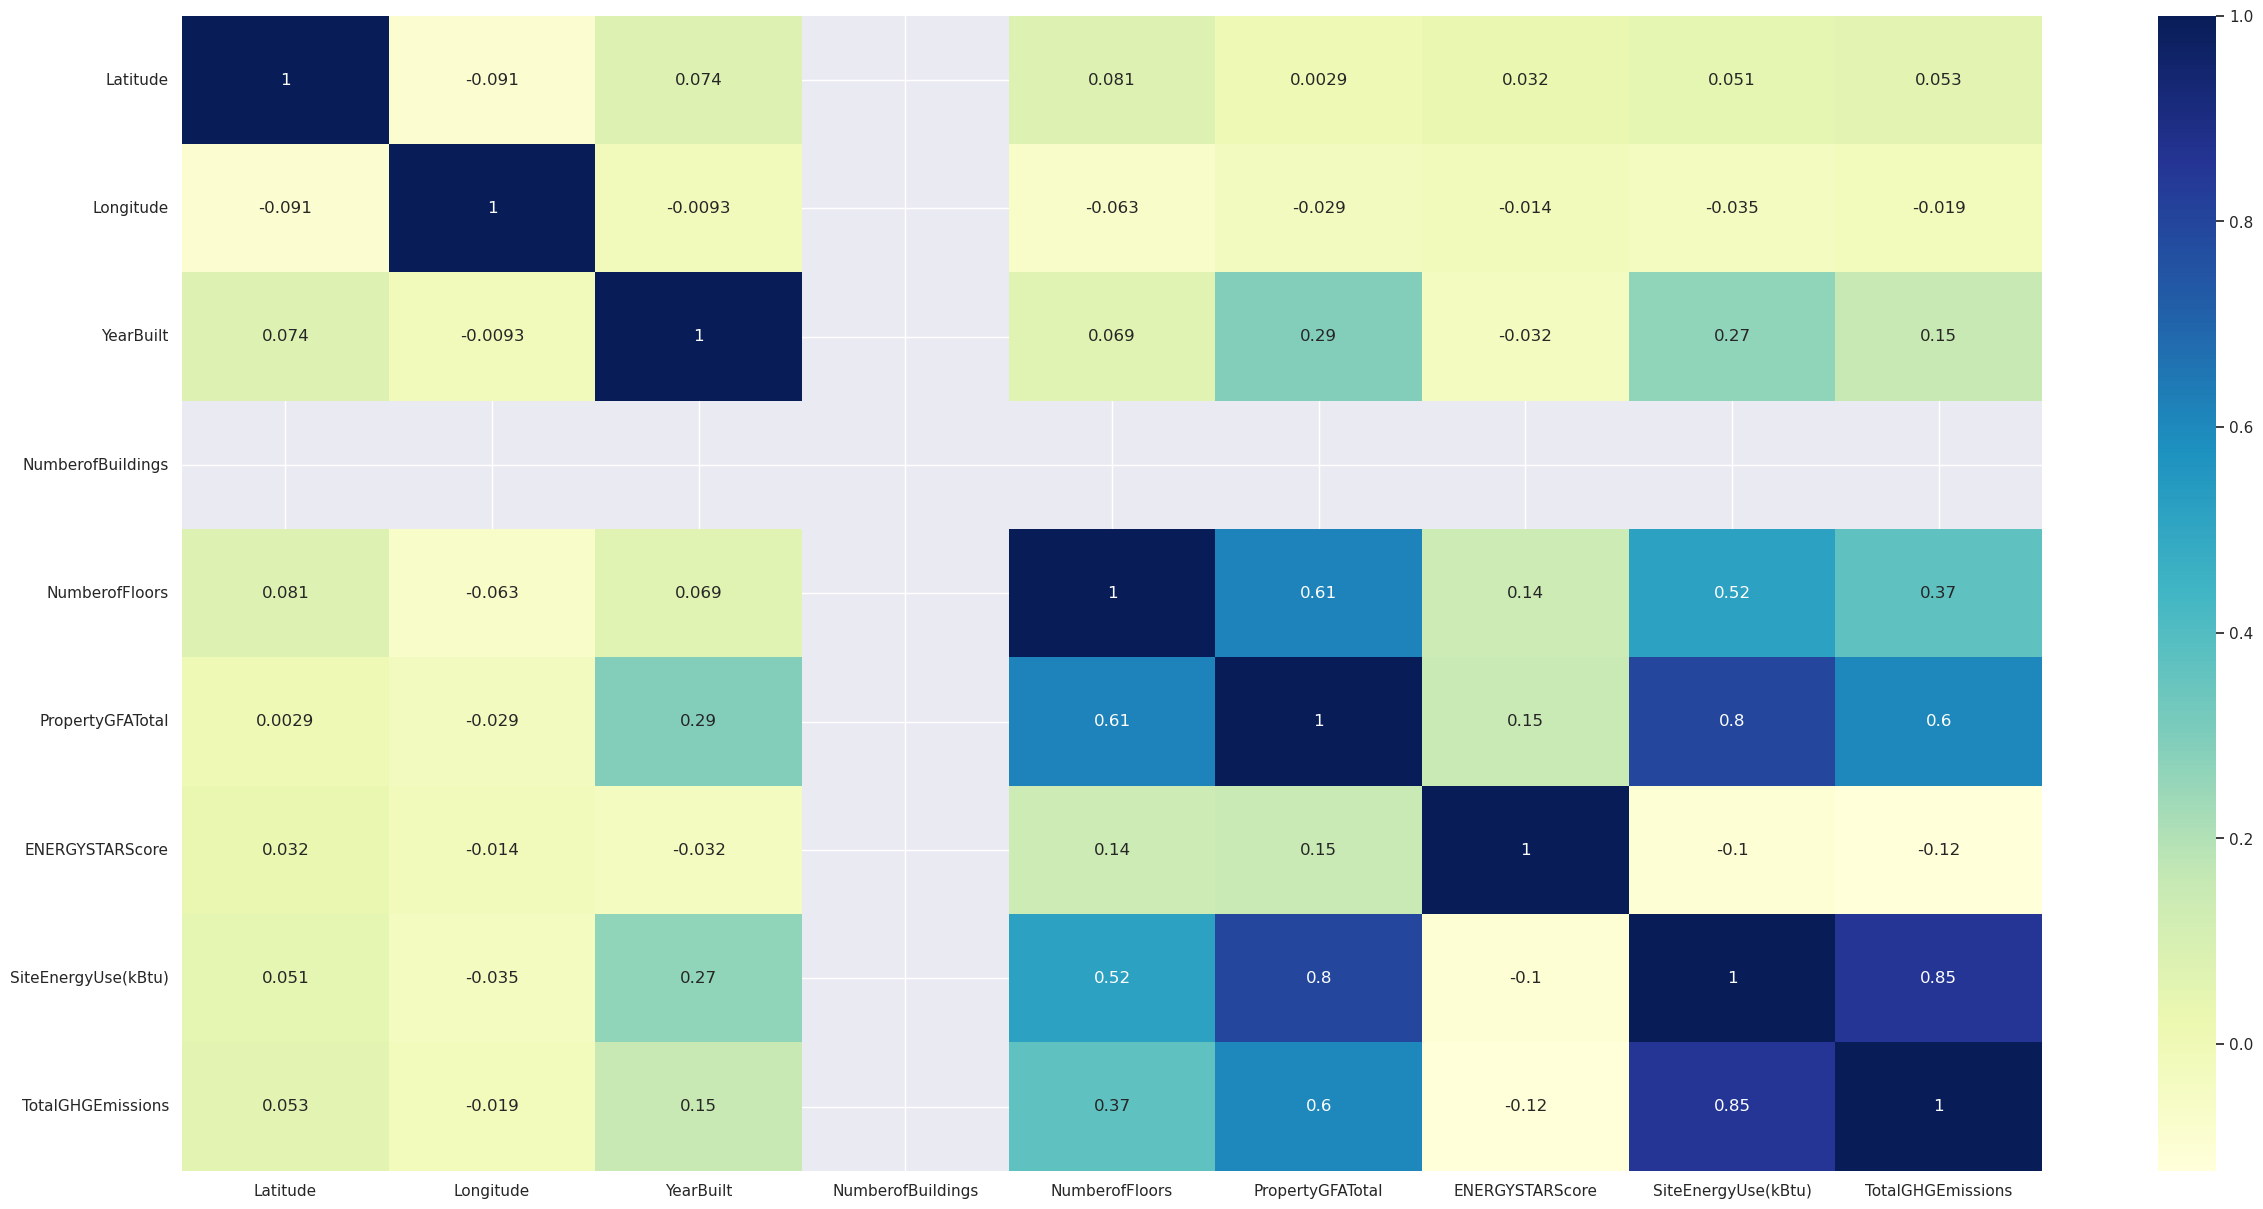

In [19]:
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

<Axes: >

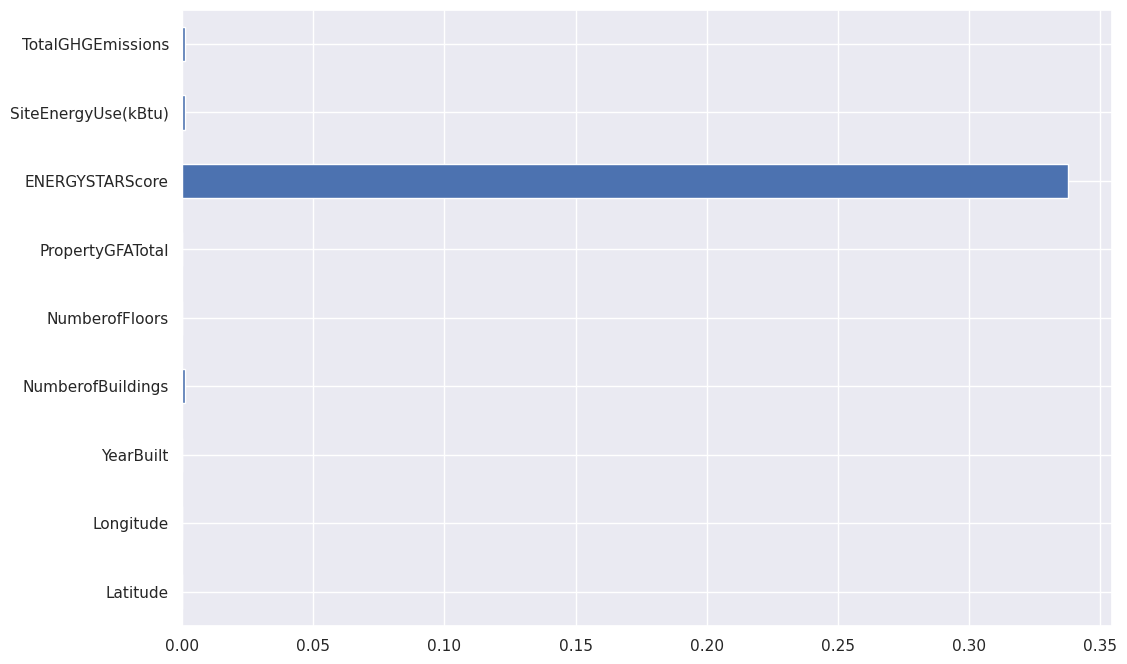

In [20]:
df.isnull().mean(axis = 0).plot.barh(figsize = (12,8))

### Step 8: Data Imputation
We take out the values we want to predict in the next notebook. 
We handle missing values by filling them with the mean of their respective columns.

In [21]:
desired = df[df['SiteEnergyUse(kBtu)'].isna()]
desired0 = df[df['TotalGHGEmissions'].isna()]

desired.head()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
578,47.60380,-122.33293,1924.0,NaN,4.0,63150.0,NaN,NaN,NaN
2670,47.66182,-122.31345,1928.0,NaN,2.0,23006.6,NaN,NaN,NaN


In [22]:
df.fillna(value = df.mean(axis = 0, numeric_only=True) , axis = 0 , inplace=True)
df.isnull().mean()

Latitude               0.0
Longitude              0.0
YearBuilt              0.0
NumberofBuildings      0.0
NumberofFloors         0.0
PropertyGFATotal       0.0
ENERGYSTARScore        0.0
SiteEnergyUse(kBtu)    0.0
TotalGHGEmissions      0.0
dtype: float64

### Step 9: Save Preprocessed Data
Finally, we save the cleaned and preprocessed DataFrame to a new CSV file named 'energy_explored.csv'.

In [23]:
df.to_csv('energy_explored.csv', index = False)